In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.utils import resample

In [2]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: ...working... done

# All requested packages already installed.



In [3]:
df= pd.read_csv("Collisions.csv")

In [4]:
df.head(20)

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N
5,-122.333067,47.544302,6,322205,323705,3694789,Matched,Block,NaN,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,...,Dry,Daylight,NaN,NaN,NaN,14,From same direction - both going straight - on...,0,0,N
6,-122.338543,47.616874,7,322275,323775,E949282,Matched,Block,NaN,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,0,0,N
7,NaN,NaN,8,5721,5721,1786583,Unmatched,NaN,NaN,NaN,...,Dry,Daylight,NaN,3239035.0,NaN,32,One parked--one moving,0,0,N
8,-122.360959,47.571594,9,33400,33400,1076890,Matched,Block,NaN,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,...,Dry,Daylight,NaN,5187041.0,NaN,13,From same direction - both going straight - bo...,0,0,N
9,-122.336856,47.655652,10,20400,20400,1220377,Matched,Block,NaN,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,...,Wet,Dusk,NaN,4216016.0,NaN,14,From same direction - both going straight - on...,0,0,N


In [5]:
df.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [6]:
df.shape

(221738, 40)

In [7]:
df["SEVERITYCODE"].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [8]:
df["SEVERITYDESC"].value_counts()

Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [9]:
df.drop(df.index[df["SEVERITYDESC"]=='Unknown'], axis = 0, inplace=True)
df.reset_index(inplace= True)
df["INATTENTIONIND"].replace({np.nan:0}, inplace =True)
df["INATTENTIONIND"].replace("Y", 1, inplace=True)


df["PEDROWNOTGRNT"].replace({np.nan:0},inplace =True)
df["PEDROWNOTGRNT"].replace("Y", 1, inplace=True)

df["UNDERINFL"].replace(np.nan, 0, inplace=True)
df["UNDERINFL"].replace('N', 0, inplace=True)
df["UNDERINFL"].replace('0', 0, inplace=True)
df["UNDERINFL"].replace('1', 1, inplace=True)
df["UNDERINFL"].replace("Y", 1, inplace=True)


df["SPEEDING"].replace({np.nan:0},inplace =True)
df["SPEEDING"].replace("Y", 1, inplace=True)

df["HITPARKEDCAR"].replace("N", 0, inplace=True)
df["HITPARKEDCAR"].replace(np.nan, 0, inplace=True)
df["HITPARKEDCAR"].replace("Y", 1, inplace=True)

print(df["SEVERITYDESC"].value_counts())
print(df["UNDERINFL"].value_counts())
print(df["PEDROWNOTGRNT"].value_counts())
print(df["INATTENTIONIND"].value_counts())
print(df["SPEEDING"].value_counts())


Property Damage Only Collision    137776
Injury Collision                   58842
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64
0    190452
1      9629
Name: UNDERINFL, dtype: int64
0    194887
1      5194
Name: PEDROWNOTGRNT, dtype: int64
0    169893
1     30188
Name: INATTENTIONIND, dtype: int64
0    190146
1      9935
Name: SPEEDING, dtype: int64


In [10]:
for i in range(0,len(df["SEVERITYCODE"])):
    if df["SEVERITYDESC"][i] == "Serious Injury Collision":
        df["SEVERITYCODE"][i] = 3
    if df["SEVERITYDESC"][i] == "Fatality Collision":
        df["SEVERITYCODE"][i] = 4
print(df["SEVERITYCODE"].value_counts())


C:\Users\ARINDAM\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ARINDAM\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


1    137776
2     58842
3      3111
4       352
Name: SEVERITYCODE, dtype: int64


In [11]:
df.shape

(200081, 41)

In [12]:
df["SEVERITYDESC"].value_counts()

Property Damage Only Collision    137776
Injury Collision                   58842
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [13]:
df.drop(["index","OBJECTID","STATUS","INCKEY","COLDETKEY","INTKEY","REPORTNO","EXCEPTRSNCODE","EXCEPTRSNDESC","SDOTCOLNUM","ST_COLCODE","ST_COLDESC","SDOT_COLCODE","SDOT_COLDESC","JUNCTIONTYPE"],axis= 1, inplace= True)

In [14]:
df.shape

(200081, 26)

In [15]:
df.head()

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,...,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,...,0,0,Clear,Dry,Daylight,0,0,0,0,0
1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,...,1,0,Raining,Wet,Dusk,0,0,0,0,0
2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,...,0,0,Clear,Dry,Dark - Street Lights On,0,0,0,0,0
3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,...,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,...,0,0,Clear,Ice,Dark - Street Lights On,0,1,0,0,0


In [16]:
df.shape

(200081, 26)

In [17]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
LOCATION            object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
INATTENTIONIND       int64
UNDERINFL            int64
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT        int64
SPEEDING             int64
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR         int64
dtype: object

In [18]:
pd.set_option('display.max_columns', None)
df=df.astype({"SEVERITYCODE":np.int})
df.head(10)

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,0,0,Clear,Dry,Daylight,0,0,0,0,0
1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,1,0,Raining,Wet,Dusk,0,0,0,0,0
2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,0,0,Clear,Dry,Dark - Street Lights On,0,0,0,0,0
3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,0,0,Clear,Ice,Dark - Street Lights On,0,1,0,0,0
5,-122.333067,47.544302,Block,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,0,0,Clear,Dry,Daylight,0,0,0,0,0
6,-122.338543,47.616874,Block,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,1,Property Damage Only Collision,Cycles,3,0,1,1,0,0,0,2019/08/08 00:00:00+00,8/8/2019 8:57:00 AM,1,0,Overcast,Dry,Daylight,0,0,0,0,0
7,NaN,NaN,NaN,NaN,1,Property Damage Only Collision,Parked Car,0,0,0,2,0,0,0,2007/08/27 00:00:00+00,8/27/2007,0,0,Clear,Dry,Daylight,0,0,0,0,0
8,-122.360959,47.571594,Block,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,3,Serious Injury Collision,Rear Ended,3,0,0,3,3,1,0,2005/07/06 00:00:00+00,7/6/2005,1,0,Clear,Dry,Daylight,0,0,0,0,0
9,-122.336856,47.655652,Block,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2004/08/03 00:00:00+00,8/3/2004,1,0,Clear,Wet,Dusk,0,0,0,0,0


In [19]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
LOCATION            object
SEVERITYCODE         int32
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
INATTENTIONIND       int64
UNDERINFL            int64
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT        int64
SPEEDING             int64
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR         int64
dtype: object

In [20]:
df.reset_index(inplace= True)

In [21]:
df.columns

Index(['index', 'X', 'Y', 'ADDRTYPE', 'LOCATION', 'SEVERITYCODE',
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'PEDCOUNT',
       'PEDCYLCOUNT', 'VEHCOUNT', 'INJURIES', 'SERIOUSINJURIES', 'FATALITIES',
       'INCDATE', 'INCDTTM', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'SEGLANEKEY',
       'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [22]:
for i in df.columns:
    df=df.drop(df.index[df[i].isnull()== True])
df.reset_index(inplace = True)

In [23]:
df.shape

(189559, 28)

In [24]:
df.head(20)

,level_0,index,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,0,0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,0,0,Clear,Dry,Daylight,0,0,0,0,0
1,1,1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,1,0,Raining,Wet,Dusk,0,0,0,0,0
2,2,2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,0,0,Clear,Dry,Dark - Street Lights On,0,0,0,0,0
3,3,3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
4,4,4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,0,0,Clear,Ice,Dark - Street Lights On,0,1,0,0,0
5,5,5,-122.333067,47.544302,Block,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,0,0,Clear,Dry,Daylight,0,0,0,0,0
6,6,6,-122.338543,47.616874,Block,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,1,Property Damage Only Collision,Cycles,3,0,1,1,0,0,0,2019/08/08 00:00:00+00,8/8/2019 8:57:00 AM,1,0,Overcast,Dry,Daylight,0,0,0,0,0
7,8,8,-122.360959,47.571594,Block,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,3,Serious Injury Collision,Rear Ended,3,0,0,3,3,1,0,2005/07/06 00:00:00+00,7/6/2005,1,0,Clear,Dry,Daylight,0,0,0,0,0
8,9,9,-122.336856,47.655652,Block,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2004/08/03 00:00:00+00,8/3/2004,1,0,Clear,Wet,Dusk,0,0,0,0,0
9,10,10,-122.385859,47.581191,Block,SW ADMIRAL WAY BETWEEN 42ND AVE SW AND CALIFOR...,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2007/07/23 00:00:00+00,7/23/2007 4:30:00 PM,0,0,Clear,Dry,Daylight,0,0,0,0,0


In [25]:
df.isnull().sum(axis=0)

level_0            0
index              0
X                  0
Y                  0
ADDRTYPE           0
LOCATION           0
SEVERITYCODE       0
SEVERITYDESC       0
COLLISIONTYPE      0
PERSONCOUNT        0
PEDCOUNT           0
PEDCYLCOUNT        0
VEHCOUNT           0
INJURIES           0
SERIOUSINJURIES    0
FATALITIES         0
INCDATE            0
INCDTTM            0
INATTENTIONIND     0
UNDERINFL          0
WEATHER            0
ROADCOND           0
LIGHTCOND          0
PEDROWNOTGRNT      0
SPEEDING           0
SEGLANEKEY         0
CROSSWALKKEY       0
HITPARKEDCAR       0
dtype: int64

In [26]:
df.drop(["level_0","index"], axis= 1 ,inplace = True)

In [27]:
df.head(10)

,X,Y,ADDRTYPE,LOCATION,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,Intersection,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,0,0,Clear,Dry,Daylight,0,0,0,0,0
1,-122.361405,47.702064,Block,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,1,0,Raining,Wet,Dusk,0,0,0,0,0
2,-122.317414,47.664028,Block,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,Head On,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,0,0,Clear,Dry,Dark - Street Lights On,0,0,0,0,0
3,-122.318234,47.619927,Intersection,11TH AVE E AND E JOHN ST,2,Injury Collision,Pedestrian,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,0,0,Raining,Wet,Dark - Street Lights On,0,0,0,0,0
4,-122.351724,47.560306,Block,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,Other,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,0,0,Clear,Ice,Dark - Street Lights On,0,1,0,0,0
5,-122.333067,47.544302,Block,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,0,0,Clear,Dry,Daylight,0,0,0,0,0
6,-122.338543,47.616874,Block,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,1,Property Damage Only Collision,Cycles,3,0,1,1,0,0,0,2019/08/08 00:00:00+00,8/8/2019 8:57:00 AM,1,0,Overcast,Dry,Daylight,0,0,0,0,0
7,-122.360959,47.571594,Block,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,3,Serious Injury Collision,Rear Ended,3,0,0,3,3,1,0,2005/07/06 00:00:00+00,7/6/2005,1,0,Clear,Dry,Daylight,0,0,0,0,0
8,-122.336856,47.655652,Block,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,1,Property Damage Only Collision,Rear Ended,2,0,0,2,0,0,0,2004/08/03 00:00:00+00,8/3/2004,1,0,Clear,Wet,Dusk,0,0,0,0,0
9,-122.385859,47.581191,Block,SW ADMIRAL WAY BETWEEN 42ND AVE SW AND CALIFOR...,1,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,2007/07/23 00:00:00+00,7/23/2007 4:30:00 PM,0,0,Clear,Dry,Daylight,0,0,0,0,0


In [28]:
mean_long = df["X"].mean()
mean_lat = df["Y"].mean()

print(mean_long)
print(mean_lat)

seattle_map = folium.Map(location=[mean_lat, mean_long], zoom_start=13)
seattle_map

-122.3305310565504
47.619479381609004


In [29]:
df.dtypes

X                  float64
Y                  float64
ADDRTYPE            object
LOCATION            object
SEVERITYCODE         int32
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
INATTENTIONIND       int64
UNDERINFL            int64
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT        int64
SPEEDING             int64
SEGLANEKEY           int64
CROSSWALKKEY         int64
HITPARKEDCAR         int64
dtype: object

After much cleaning the features that are left to be conditioned are "WEATHER", "ROADCOND", "LIGHTCOND". They are categorical data so need to be changed to numeric via one hot encoding. But before that the entried having "Unknown" need to be removed

In [30]:
df.drop(df.index[df["WEATHER"]=='Unknown'], axis = 0, inplace=True)
df.drop(df.index[df["ROADCOND"]=='Unknown'], axis = 0, inplace=True)
df.drop(df.index[df["LIGHTCOND"]=='Unknown'], axis = 0, inplace=True)
df.reset_index(inplace= True)

print(df["WEATHER"].value_counts())
print(df["ROADCOND"].value_counts())
print(df["LIGHTCOND"].value_counts())
print(df["SEVERITYCODE"].value_counts())

Clear                       110441
Raining                      32489
Overcast                     27244
Snowing                        831
Fog/Smog/Smoke                 547
Other                          253
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               43
Severe Crosswind                25
Partly Cloudy                   10
Name: WEATHER, dtype: int64
Dry               123433
Wet                46319
Ice                 1092
Snow/Slush           842
Other                102
Standing Water        99
Sand/Mud/Dirt         59
Oil                   50
Name: ROADCOND, dtype: int64
Daylight                    113856
Dark - Street Lights On      47286
Dusk                          5721
Dawn                          2449
Dark - No Street Lights       1381
Dark - Street Lights Off      1114
Other                          167
Dark - Unknown Lighting         22
Name: LIGHTCOND, dtype: int64
1    113151
2     55572
3      2945
4       328
Name: SEVERITYCODE, dtype: int64


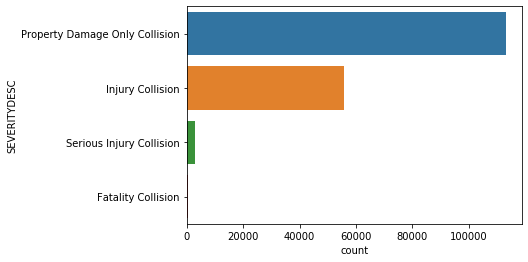

In [31]:
ax = sn.countplot(y="SEVERITYDESC", data=df)

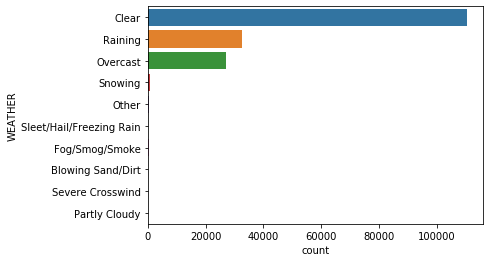

In [32]:
ax = sn.countplot(y="WEATHER", data=df)

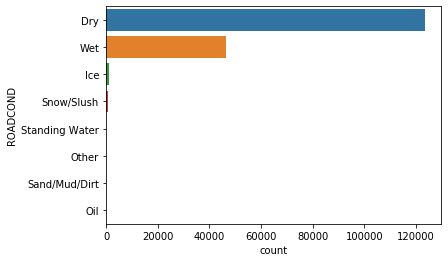

In [33]:
ax = sn.countplot(y="ROADCOND", data=df)

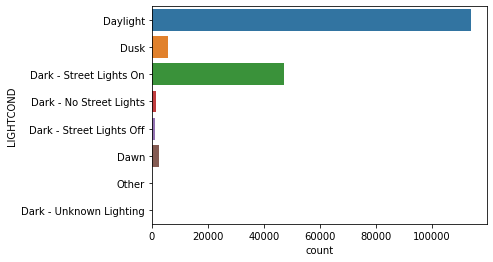

In [34]:
ax = sn.countplot(y="LIGHTCOND", data=df)

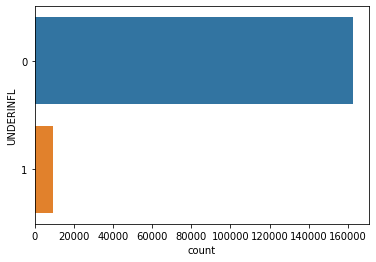

In [35]:
ax = sn.countplot(y="UNDERINFL", data=df)

In [36]:
dummy_variable_1 = pd.get_dummies(df["WEATHER"])
dummy_variable_2 = pd.get_dummies(df["ROADCOND"])
dummy_variable_3 = pd.get_dummies(df["LIGHTCOND"])
dummy_variable_4 = pd.get_dummies(df["COLLISIONTYPE"])
dummy_variable_5 = pd.get_dummies(df["ADDRTYPE"])
df=pd.concat([df, dummy_variable_1,dummy_variable_2,dummy_variable_3,dummy_variable_4,dummy_variable_5], axis=1)
df.drop(["WEATHER","ROADCOND", "LIGHTCOND","COLLISIONTYPE","ADDRTYPE"],axis=1, inplace= True)
df.drop(["index"], axis=1, inplace = True)

In [37]:

df.head(20)

,X,Y,LOCATION,SEVERITYCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INCDATE,INCDTTM,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection
0,-122.356511,47.517361,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,2020/01/19 00:00:00+00,1/19/2020 9:01:00 AM,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,-122.361405,47.702064,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,2,0,0,2,0,0,0,2005/04/11 00:00:00+00,4/11/2005 6:31:00 PM,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,-122.317414,47.664028,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,2,0,0,2,1,0,0,2013/03/31 00:00:00+00,3/31/2013 2:09:00 AM,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
3,-122.318234,47.619927,11TH AVE E AND E JOHN ST,2,Injury Collision,3,1,0,1,1,0,0,2020/01/06 00:00:00+00,1/6/2020 5:55:00 PM,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
4,-122.351724,47.560306,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,2,0,0,1,1,0,0,2009/12/25 00:00:00+00,12/25/2009 7:00:00 PM,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
5,-122.333067,47.544302,1ST AV S NB OFF RP BETWEEN 1ST AV S BR NB AND ...,1,Property Damage Only Collision,2,0,0,2,0,0,0,2019/08/08 00:00:00+00,8/8/2019 12:49:00 PM,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
6,-122.338543,47.616874,8TH AVE BETWEEN WESTLAKE AVE AND BLANCHARD ST,1,Property Damage Only Collision,3,0,1,1,0,0,0,2019/08/08 00:00:00+00,8/8/2019 8:57:00 AM,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0
7,-122.360959,47.571594,WEST SEATTLE BR WB BETWEEN W SEATTLE BR WB OFF...,3,Serious Injury Collision,3,0,0,3,3,1,0,2005/07/06 00:00:00+00,7/6/2005,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
8,-122.336856,47.655652,N 40TH ST BETWEEN DENSMORE AVE N AND WALLINGFO...,1,Property Damage Only Collision,2,0,0,2,0,0,0,2004/08/03 00:00:00+00,8/3/2004,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
9,-122.385859,47.581191,SW ADMIRAL WAY BETWEEN 42ND AVE SW AND CALIFOR...,1,Property Damage Only Collision,2,0,0,2,0,0,0,2007/07/23 00:00:00+00,7/23/2007 4:30:00 PM,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [38]:

pd.set_option('display.max_rows',80 )
df.dtypes

X                           float64
Y                           float64
LOCATION                     object
SEVERITYCODE                  int32
SEVERITYDESC                 object
PERSONCOUNT                   int64
PEDCOUNT                      int64
PEDCYLCOUNT                   int64
VEHCOUNT                      int64
INJURIES                      int64
SERIOUSINJURIES               int64
FATALITIES                    int64
INCDATE                      object
INCDTTM                      object
INATTENTIONIND                int64
UNDERINFL                     int64
PEDROWNOTGRNT                 int64
SPEEDING                      int64
SEGLANEKEY                    int64
CROSSWALKKEY                  int64
HITPARKEDCAR                  int64
Blowing Sand/Dirt             uint8
Clear                         uint8
Fog/Smog/Smoke                uint8
Other                         uint8
Overcast                      uint8
Partly Cloudy                 uint8
Raining                     

In [39]:
df["INCDATE"] = pd.to_datetime(df["INCDATE"])
df["INCDTTM"] = pd.to_datetime(df["INCDTTM"])

In [40]:
df.dtypes


X                                       float64
Y                                       float64
LOCATION                                 object
SEVERITYCODE                              int32
SEVERITYDESC                             object
PERSONCOUNT                               int64
PEDCOUNT                                  int64
PEDCYLCOUNT                               int64
VEHCOUNT                                  int64
INJURIES                                  int64
SERIOUSINJURIES                           int64
FATALITIES                                int64
INCDATE                     datetime64[ns, UTC]
INCDTTM                          datetime64[ns]
INATTENTIONIND                            int64
UNDERINFL                                 int64
PEDROWNOTGRNT                             int64
SPEEDING                                  int64
SEGLANEKEY                                int64
CROSSWALKKEY                              int64
HITPARKEDCAR                            

In [41]:
df['Day'] = df['INCDATE'].dt.day
df['Month'] = df['INCDATE'].dt.month
df['Year'] = df['INCDATE'].dt.year
df['Hour'] = df['INCDTTM'].dt.hour
df['Min'] = df['INCDTTM'].dt.minute

In [42]:
df.drop(['INCDATE'], inplace = True, axis = 1)
df.drop(['INCDTTM'], inplace = True, axis = 1)

In [43]:
df.head()

,X,Y,LOCATION,SEVERITYCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection,Day,Month,Year,Hour,Min
0,-122.356511,47.517361,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,19,1,2020,9,1
1,-122.361405,47.702064,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,11,4,2005,18,31
2,-122.317414,47.664028,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,31,3,2013,2,9
3,-122.318234,47.619927,11TH AVE E AND E JOHN ST,2,Injury Collision,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,1,2020,17,55
4,-122.351724,47.560306,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,25,12,2009,19,0


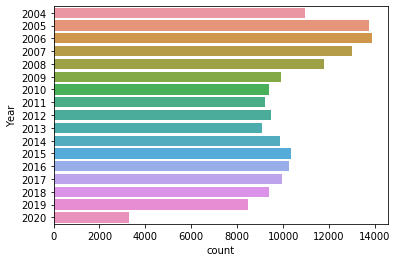

In [70]:
ax = sn.countplot(y="Year", data=df)

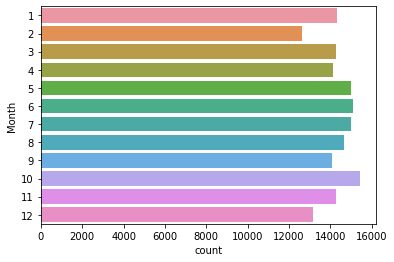

In [71]:
ax = sn.countplot(y="Month", data=df)

In [44]:
df.corr()

,X,Y,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection,Day,Month,Year,Hour,Min
X,1.000000,-0.158398,0.002325,0.011228,0.010786,-0.004704,-0.015722,0.009350,-0.006890,-0.000394,-0.019555,-0.033462,0.007147,-0.009947,-0.002241,0.013406,-0.017907,-0.000806,-0.001727,-0.001542,-0.002645,0.001009,0.002143,0.001960,-0.000085,-0.002236,-0.000937,-0.007936,0.008384,0.000878,-0.003478,0.003328,0.000368,-0.003405,0.006697,0.000800,0.006275,-0.024994,-0.005267,0.000275,0.021281,0.003344,-0.001757,-0.002541,-0.004983,0.003785,0.001374,0.007244,-0.041070,0.011856,0.024690,0.002284,0.008948,-0.001241,0.001241,-0.003066,-0.001826,0.009646,0.009595,0.010495
Y,-0.158398,1.000000,0.023372,-0.010844,0.014857,0.029744,0.017973,0.016175,-0.000484,-0.003637,0.013191,-0.005061,0.026716,-0.026867,0.005875,0.011384,-0.017270,0.000588,-0.000914,-0.006041,0.000774,0.008666,-0.003093,-0.006395,0.003149,0.001056,0.000533,0.004625,-0.010696,-0.002602,-0.002140,0.001277,0.001332,-0.003852,-0.002615,-0.012063,-0.008332,-0.003120,-0.001315,-0.015837,0.007004,0.009743,-0.001003,0.039065,0.030036,-0.018763,0.023563,-0.044168,-0.012989,0.015922,0.002649,-0.002671,-0.030867,-0.044808,0.044808,0.001380,0.008118,-0.023121,0.020846,-0.011236
SEVERITYCODE,0.002325,0.023372,1.000000,0.103494,0.281622,0.214979,-0.111904,0.768421,0.337671,0.207358,0.014653,0.055730,0.214777,0.049058,0.105027,0.180953,-0.089321,-0.001825,0.001811,-0.000510,0.001195,-0.007456,0.004882,0.008251,0.000846,-0.003892,-0.018914,0.000260,-0.013558,0.001197,0.003616,-0.000251,-0.021481,-0.001817,0.005408,-0.016390,-0.004883,-0.015267,0.000012,0.004835,0.015851,0.004368,-0.005900,0.054278,0.213976,0.036287,0.039765,-0.035183,-0.260770,0.278854,0.077348,-0.033613,-0.137577,-0.172413,0.172413,-0.000869,0.008649,0.021608,0.022926,0.033591
PERSONCOUNT,0.011228,-0.010844,0.103494,1.000000,-0.027662,-0.047312,0.398145,0.266295,0.104917,0.046944,0.062324,0.017555,-0.034985,-0.005348,-0.025278,-0.038310,-0.040913,-0.002069,0.000828,-0.007325,-0.011653,-0.004319,0.000469,0.006308,0.001417,-0.001891,-0.005331,0.001445,-0.015155,-0.006122,-0.005231,-0.006430,-0.001305,-0.007766,0.002663,-0.016320,-0.006537,-0.001419,-0.005502,-0.023373,0.009939,0.005343,-0.006875,0.073765,-0.048470,0.023738,0.041504,-0.181563,-0.063076,-0.045376,0.122382,0.020809,0.032541,-0.044990,0.044990,0.000497,0.000005,-0.058016,0.026319,0.007961
PEDCOUNT,0.010786,0.014857,0.281622,-0.027662,1.000000,-0.023926,-0.327283,0.151567,0.127374,0.074798,-0.014042,0.023271,0.484738,-0.035902,-0.001585,0.557303,-0.034792,-0.001675,-0.017975,-0.001689,0.000773,-0.005245,-0.001603,0.027868,-0.000372,0.000713,-0.004121,-0.018170,-0.008270,-0.003584,-0.002979,-0.001079,-0.004287,-0.002871,0.021095,0.000363,0.002197,0.027885,0.004536,0.011035,-0.030674,0.002869,-0.000695,-0.100758,-0.023325,-0.022852,-0.059307,-0.073823,-0.098231,0.939462,-0.098695,-0.025608,-0.068953,-0.138344,0.138344,0.004504,0.006472,0.032491,0.027205,0.012776
PEDCYLCOUNT,-0.004704,0.029744,0.214979,-0.047312,-0.023926,1.000000,-0.312491,0.108951,0.057972,0.009802,-0.003427,-0.020682,0.317714,-0.024913,0.455691,0.099853,-0.027963,-0.000912,0.039553,-0.007632,-0.002949,-0.007587,-0.001413,-0.037489,-0.002234,-0.003506,-0.011990,0.045407,-0.010392,-0.003160,-0.001892,0.000014,-0.011167,0.000875,-0.042282,-0.005229,-0.004221,-0.043271,0.000726,0.008703,0.038781,0.004777,-0.003727,-0.091519,0.988669,-0.020274,-0.052923,-0.070424,-0.091257,-0.0382

#### We have cleaned the data and made it ready for exploration. We will keep this dataframe df for exploration using graphs and sharts for later use and meanwhile we will prepare another dataframe using df by  taking up the features for our model building

In [45]:
features = df.copy()

In [46]:
features.shape

(171996, 62)

In [47]:
features.head()

,X,Y,LOCATION,SEVERITYCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection,Day,Month,Year,Hour,Min
0,-122.356511,47.517361,17TH AVE SW AND SW ROXBURY ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,19,1,2020,9,1
1,-122.361405,47.702064,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,1,Property Damage Only Collision,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,11,4,2005,18,31
2,-122.317414,47.664028,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,2,Injury Collision,2,0,0,2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,31,3,2013,2,9
3,-122.318234,47.619927,11TH AVE E AND E JOHN ST,2,Injury Collision,3,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,6,1,2020,17,55
4,-122.351724,47.560306,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,2,Injury Collision,2,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,25,12,2009,19,0


In [48]:
features["SEVERITYCODE"].value_counts()

1    113151
2     55572
3      2945
4       328
Name: SEVERITYCODE, dtype: int64

In [49]:
features_majority1 = features[features.SEVERITYCODE==1]
features_majority2 = features[features.SEVERITYCODE==2]
features_majority3 = features[features.SEVERITYCODE==3]
features_minority = features[features.SEVERITYCODE==4]
features_majority1_downsampled = resample(features_majority1, replace=False,n_samples=328,random_state=123)
features_majority2_downsampled = resample(features_majority2, replace=False,n_samples=328,random_state=123)
features_majority3_downsampled = resample(features_majority3, replace=False,n_samples=328,random_state=123)
features_downsampled = pd.concat([features_majority1_downsampled,features_majority2_downsampled,features_majority3_downsampled,features_minority])
print(features_downsampled["SEVERITYCODE"].value_counts())
features_downsampled.head(10)

4    328
3    328
2    328
1    328
Name: SEVERITYCODE, dtype: int64


,X,Y,LOCATION,SEVERITYCODE,SEVERITYDESC,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Other,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk,Other,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,Block,Intersection,Day,Month,Year,Hour,Min
166895,-122.334214,47.557412,1ST AVE S AND S HUDSON ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,3,9,2019,11,8
63223,-122.360743,47.702400,3RD AVE NW AND HOLMAN RD NW,1,Property Damage Only Collision,3,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4,2008,0,0
33739,-122.333719,47.665036,MERIDIAN AVE N AND N 50TH ST,1,Property Damage Only Collision,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,8,12,2006,0,0
40018,-122.376627,47.532641,35TH AVE SW BETWEEN SW HOLDEN S ST AND SW KENY...,1,Property Damage Only Collision,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,25,5,2006,19,21
87020,-122.333731,47.590312,EDGAR MARTINEZ DR S BETWEEN 1ST AVE S AND OCCI...,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,14,7,2011,16,34
119317,-122.355487,47.709620,GREENWOOD AVE N BETWEEN N 110TH ST AND N 112TH ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,17,10,2014,8,20
159647,-122.279122,47.515250,M L KING JR WR WAY S BETWEEN MERTON WAY S AND ...,1,Property Damage Only Collision,4,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,15,9,2019,15,12
130203,-122.339439,47.564500,EAST MARGINAL WAY S AND S IDAHO ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,12,2015,19,9
141760,-122.318338,47.602194,BOREN AVE BETWEEN E YESLER WAY AND E FIR ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,22,11,2016,16,29
161015,-122.320703,47.664958,7TH AVE NE AND NE 50TH ST,1,Property Damage Only Collision,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,25,10,2018,11,8


In [50]:
y = features_downsampled["SEVERITYCODE"]
features = features_downsampled.copy()
features.drop(["LOCATION","SEVERITYDESC"], axis = 1, inplace = True)

In [51]:
print(y.head())
print(features.head())

166895    1
63223     1
33739     1
40018     1
87020     1
Name: SEVERITYCODE, dtype: int32
                 X          Y  SEVERITYCODE  PERSONCOUNT  PEDCOUNT  \
166895 -122.334214  47.557412             1            2         0   
63223  -122.360743  47.702400             1            3         0   
33739  -122.333719  47.665036             1            3         0   
40018  -122.376627  47.532641             1            2         0   
87020  -122.333731  47.590312             1            2         0   

        PEDCYLCOUNT  VEHCOUNT  INJURIES  SERIOUSINJURIES  FATALITIES  \
166895            0         2         0                0           0   
63223             0         2         0                0           0   
33739             0         3         0                0           0   
40018             0         2         0                0           0   
87020             0         2         0                0           0   

        INATTENTIONIND  UNDERINFL  PEDROWNOTGRNT  SPE

In [52]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(features).transform(features)

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1049, 60) (1049,)
Test set: (263, 60) (263,)


## KNN Model

In [54]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

print(mean_acc)
print(std_acc)

[0.54752852 0.53612167 0.58555133 0.56273764 0.57794677 0.56273764
 0.58935361 0.59315589 0.60076046 0.58555133 0.60456274 0.61977186
 0.62357414 0.62737643 0.6121673  0.62357414 0.63878327 0.60456274
 0.60076046]
[0.03069171 0.03075076 0.03037666 0.03058765 0.03045437 0.03058765
 0.03033501 0.03029149 0.03019879 0.03037666 0.0301496  0.02993368
 0.02987486 0.02981408 0.0300455  0.02987486 0.02961985 0.0301496
 0.03019879]


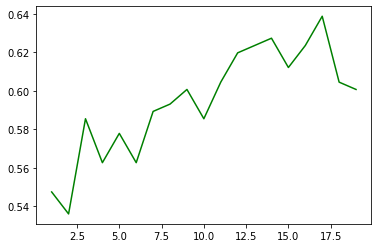

In [55]:
plt.plot(range(1,Ks),mean_acc,'g')

In [56]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.6387832699619772 with k= 17


**Selecting the final KNN Model**

In [57]:
knn_final = KNeighborsClassifier(n_neighbors = 17).fit(X_train,y_train)
knn_final

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

## Decision Tree Model

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)
    

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Support Vector Machines

In [59]:
from sklearn import svm
from sklearn.metrics import f1_score

In [60]:
func = ['sigmoid', 'poly', 'rbf', 'linear']
accuracy_score = []

for k in func:
    svm_model = svm.SVC(C = 0.01, gamma = 'auto', kernel = k)
    svm_model.fit(X_train, y_train)
    svm_yhat = svm_model.predict(X_test)
    accuracy_score.append(f1_score(y_test, svm_yhat, average = 'weighted'))
accuracy_score

[0.08220957419172, 0.08220957419172, 0.08220957419172, 1.0]

**Selecting the final SVM model**

In [61]:
svm_final = svm.SVC(C = 0.01, gamma = 'auto', kernel = 'poly')
svm_final.fit(X_train, y_train)
svm_final

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Logistic Regression

Since our target varibale consit of 4 class of output we transform it into 2 class for fitting in logistic regression

In [62]:
Y = features_downsampled["SEVERITYCODE"].apply(lambda x: 1 if (x>2)  else 0)
X_train, X_test, y_train_logit, y_test_logit = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1049, 60) (1049,)
Test set: (263, 60) (263,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [64]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
accuracy_score = []
iterations = 0

for  c in regularization_val:
    for solver in solvers:
        iterations +=1
        lr_model = LogisticRegression(C = c, solver = solver)
        lr_model.fit(X_train, y_train_logit)
        lr_yhat = lr_model.predict(X_test)
        y_prob = lr_model.predict_proba(X_test)
        print(iterations, "Accuracy at C =",c,"Solver =",solver, log_loss(y_test_logit, y_prob) )
        accuracy_score.append(log_loss(y_test_logit, y_prob))

1 Accuracy at C = 0.1 Solver = lbfgs 0.059428710615787236
2 Accuracy at C = 0.1 Solver = saga 0.07192698794136289
3 Accuracy at C = 0.1 Solver = liblinear 0.05943000282973547
4 Accuracy at C = 0.1 Solver = newton-cg 0.05942878962137264


C:\Users\ARINDAM\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\ARINDAM\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


5 Accuracy at C = 0.1 Solver = sag 0.061446774148680355
6 Accuracy at C = 0.01 Solver = lbfgs 0.21557548905209895
7 Accuracy at C = 0.01 Solver = saga 0.2157106178650281
8 Accuracy at C = 0.01 Solver = liblinear 0.21595041110644142
9 Accuracy at C = 0.01 Solver = newton-cg 0.21557563986918918
10 Accuracy at C = 0.01 Solver = sag 0.2156271716638901
11 Accuracy at C = 0.001 Solver = lbfgs 0.467250708459919
12 Accuracy at C = 0.001 Solver = saga 0.46728755929176
13 Accuracy at C = 0.001 Solver = liblinear 0.4672663637647979
14 Accuracy at C = 0.001 Solver = newton-cg 0.46724997054023704
15 Accuracy at C = 0.001 Solver = sag 0.4672549620426716


**Selecting the final Logistic regression model**

In [65]:
lr_model_final = LogisticRegression(C = 0.001, solver = 'liblinear')
lr_model_final.fit(X_train, y_train_logit)
lr_model_final

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evaluation

In [66]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [67]:
knn_yhat = knn_final.predict(X_test)
jss1 = round(jaccard_similarity_score(y_test, knn_yhat), 2)

# Decision Tree
dt_yhat = dt.predict(X_test)
jss2 = round(jaccard_similarity_score(y_test, dt_yhat), 2)

# Support Vector Machine
svm_yhat = svm_final.predict(X_test)
jss3 = round(jaccard_similarity_score(y_test, svm_yhat), 2)

# Logistic Regression
lr_yhat = lr_model_final.predict(X_test)
jss4 = round(jaccard_similarity_score(y_test_logit, lr_yhat), 2)

jss_list = [jss1, jss2, jss3, jss4]
jss_list

C:\Users\ARINDAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\ARINDAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\ARINDAM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)
C:\Users\ARINDAM\anaconda3\lib\

[0.64, 1.0, 0.22, 0.91]

In [68]:
# KNN
knn_yhat = knn_final.predict(X_test)
f1 = round(f1_score(y_test, knn_yhat, average = 'weighted'), 2)

# Decision Tree
dt_yhat = dt.predict(X_test)
f2 = round(f1_score(y_test, dt_yhat, average = 'weighted'), 2)

# Support Vector Machine
svm_yhat = svm_final.predict(X_test)
f3 = round(f1_score(y_test, svm_yhat, average = 'weighted'), 2)

# Logistic Regression
lr_yhat = lr_model_final.predict(X_test)
f4 = round(f1_score(y_test_logit, lr_yhat, average = 'weighted'), 2)

f1_list = [f1, f2, f3, f4]
f1_list

[0.64, 1.0, 0.08, 0.91]

In [69]:
# Logistic Regression
lr_prob = lr_model_final.predict_proba(X_test)
ll_list = ['NA','NA','NA', round(log_loss(y_test_logit, lr_prob), 2)]
ll_list

['NA', 'NA', 'NA', 0.47]

## Based on the evaluation Logistic Regression seem to be the best model to fit the data